# Libraries


In [1]:
import numpy as np
import pandas as pd

# Parced data: feature + target

In [6]:
ssc_v = "ssc_conv/{}_ssc.txt"


adj_m = "feature/adj/{}_adj.txt"
node_m = "feature/nodes/{}_node.txt"
vert_m = "feature/vertex/{}_vertex_count.txt"

count_file = "feature/counter_all.txt"

Open all the trash


In [3]:
with open(count_file, 'r') as f:
    counter = f.read()
counter = counter.replace('\n', ' ')
counter = np.array([float(x) for x in counter.split()])
counter = counter.astype(np.int64)
len(counter)

21

In [ ]:
feature = []
feature_adj = []
feature_node = []
target = []
zaraza = []

size = 1000

for j in range (0, 3259): #len(counter)):
  i = counter[j]
  print(i)

  try:
    ssc = pd.read_csv(ssc_v.format(i))
    stress = ssc['stress [MPa]'].to_numpy()

    adj = np.loadtxt(adj_m.format(i))
    vert = np.loadtxt(vert_m.format(i))

    #node = np.loadtxt(node_m.format(i), delimiter=']')
    with open(node_m.format(i), 'r') as f:
        node = f.read()
    node = node.replace('[', '').replace(']', '').replace('\n', ' ')
    node = np.array([float(x) for x in node.split()]).reshape(-1, 3)


    #print(np.shape(adj))
    if len(adj)<=size:
      pads = size - len(adj)
      adj = np.pad(adj, ((0, pads), (0,pads)), mode = 'constant', constant_values = 0)
    else:
      adj = adj[:size, :size]

    if len(node)<=size:
      pads = size - len(node)
      node = np.pad(node, ((0, pads), (0, 0)), mode = 'constant', constant_values = 0)
      #print(np.shape(node))
    else:
      node = node[:size, :3]
      #print(np.shape(node))

    stress = np.concatenate((stress, np.zeros(size-len(stress))))
    stress = [float(item) for item in stress]

    #adj = np.concatenate((adj, np.zeros((adj.shape[0], adj.shape[1],1500-len(stress)))), axis = 2)
    #node = np.concatenate((node, np.zeros(1500-len(stress)),3))
    
    
    #print(type(stress))
    #print(vert)

    feature_adj.append(adj)
    feature_node.append(node)
    feature.append(adj)
    target.append(stress)

  except Exception as e:
    print(i, 'zaraza')
    zaraza.append(i)






5066
5069
5072
5075


stupid DNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

2025-02-12 17:44:50.920205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


: 

In [ ]:
train_f = tf.constant(feature)
train_t = tf.constant(target)

In [ ]:
#train_f, test_f, train_t, test_t = train_test_split(feature, target, test_size=0.1, random_state=123)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(72, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(24, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear',  kernel_initializer='he_normal'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_f, train_t, epochs=12, batch_size=20, verbose=1) 
model.summary()

Epoch 1/12
87/87 [==============================] - 103s 1s/step - loss: 13150.8721 - mae: 37.3803
Epoch 2/12
87/87 [==============================] - 98s 1s/step - loss: 10418.6006 - mae: 31.3214
Epoch 3/12
87/87 [==============================] - 98s 1s/step - loss: 10296.0781 - mae: 30.5900
Epoch 4/12
87/87 [==============================] - 99s 1s/step - loss: 10190.4824 - mae: 30.0202
Epoch 5/12
87/87 [==============================] - 98s 1s/step - loss: 10090.8740 - mae: 29.4853
Epoch 6/12
87/87 [==============================] - 98s 1s/step - loss: 10029.8311 - mae: 29.3310
Epoch 7/12
87/87 [==============================] - 98s 1s/step - loss: 9950.1738 - mae: 29.3216
Epoch 8/12
87/87 [==============================] - 98s 1s/step - loss: 9850.1475 - mae: 29.0658
Epoch 9/12
87/87 [==============================] - 99s 1s/step - loss: 9773.1924 - mae: 28.7907
Epoch 10/12
87/87 [==============================] - 98s 1s/step - loss: 9704.6016 - mae: 28.9138
Epoch 11/12
87/87 [===

In [8]:
train_t[178][:60]

<tf.Tensor: shape=(60,), dtype=float32, numpy=
array([  0.       ,   5.0543985,  10.108797 ,  15.163196 ,  20.217594 ,
        25.271992 ,  30.326391 ,  35.38079  ,  40.43519  ,  45.489586 ,
        50.543983 ,  55.598385 ,  60.652782 ,  65.70718  ,  70.76158  ,
        75.81598  ,  80.87038  ,  85.924774 ,  90.97917  ,  96.03353  ,
       101.087776 , 106.14181  , 111.19563  , 116.249535 , 121.303246 ,
       126.356255 , 131.40857  , 136.4604   , 141.51155  , 146.5624   ,
       151.6123   , 156.66122  , 161.70872  , 166.7539   , 171.79727  ,
       176.83878  , 181.87769  , 186.91408  , 191.94688  , 196.97781  ,
       202.00697  , 207.03506  , 212.06068  , 217.08292  , 222.1027   ,
       227.11942  , 232.13348  , 237.14536  , 242.1528   , 247.15596  ,
       252.15414  , 257.1471   , 262.13516  , 267.11807  , 272.09525  ,
       277.05838  , 282.02057  , 286.97733  , 291.93854  , 296.87216  ],
      dtype=float32)>

In [11]:
pred = model.predict(train_f[121])
#pred = ','.join(map(str, pred))
#pred = pred.replace('[', '').replace(']', '')
type(pred)

47/47 [==============================] - 0s 5ms/step


numpy.ndarray

In [ ]:
import matplotlib.pyplot as plt

47/47 [==============================] - 0s 4ms/step


FileNotFoundError: [Errno 2] No such file or directory

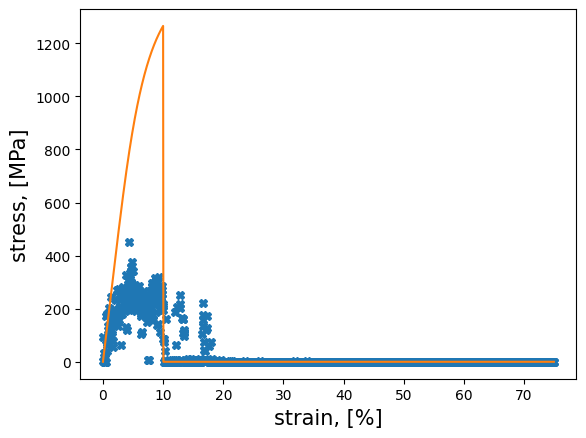

In [ ]:
strain = []
for i_x in range(0, 7500, 5):
    i_x = i_x/100
    #print(i_x)
    strain.append(i_x)

s = 122

pred = model.predict(train_f[s])
plt.plot(strain, pred, 'X')
plt.plot(strain, train_t[s])
plt.xlabel('strain, [%]', fontsize = 15)
plt.ylabel('stress, [MPa]', fontsize = 15)

plt.savefig('fig8.png', dpi = 600)

# GNN


In [ ]:
np.shape(feature_node)

(1198, 1500, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Layer
from tensorflow.keras.models import Model

import tensorflow as tf
from tensorflow.keras.layers import Dense, Layer, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2


GNN

In [ ]:
# Создание тензоров с заданными размерностями
features_tensor = tf.constant(feature_node) #tf.random.normal((300, 1500, 3), dtype=tf.float32)
adjacency_tensor = tf.constant(feature_adj) #tf.random.uniform((300, 1500, 1500), minval=0, maxval=1, dtype=tf.float32)
target_vector = tf.constant(target) #tf.random.uniform((300, 1500, 1), minval=0, maxval=1, dtype=tf.float32)

In [ ]:
# Определение слоя графовой сверткий свертки
class GraphConvolution(Layer):
    def __init__(self, units, activation=None, **kwargs):
        super(GraphConvolution, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[0][-1], self.units),
                                      initializer='glorot_uniform',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.units,),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        features, adjacency = inputs
        aggregated = tf.matmul(adjacency, features)
        output = tf.matmul(aggregated, self.kernel) + self.bias
        if self.activation is not None:
            output = self.activation(output)
        return output

# Определение модели
class GNNModel(Model):
    def __init__(self, units, activation='relu', **kwargs):
        super(GNNModel, self).__init__(**kwargs)
        self.graph_conv1 = GraphConvolution(units, activation=activation)
        self.graph_conv2 = GraphConvolution(units, activation=activation)
        self.dense = Dense(32, activation='relu')
        self.dense = Dense(1, activation='relu')

    def call(self, inputs):
        features, adjacency = inputs
        x = self.graph_conv1((features, adjacency))
        x = self.graph_conv2((x, adjacency))
        output = self.dense(x)
        return output

# Создание и компиляция модели
model = GNNModel(units=64)
model.compile(optimizer='adam', loss='mse', metrics='mae')

# Обучение модели
model.fit([features_tensor, adjacency_tensor], target_vector, epochs=10, batch_size=10) #, validation_split=0.1)



Epoch 1/10
120/120 [==============================] - 49s 391ms/step - loss: 20659.6270 - mae: 42.8481
Epoch 2/10
120/120 [==============================] - 46s 385ms/step - loss: 19498.8105 - mae: 59.2857
Epoch 3/10
120/120 [==============================] - 47s 388ms/step - loss: 19487.6562 - mae: 59.4803
Epoch 4/10
120/120 [==============================] - 46s 388ms/step - loss: 19484.1016 - mae: 60.3000
Epoch 5/10
120/120 [==============================] - 46s 384ms/step - loss: 19472.8926 - mae: 59.7562
Epoch 6/10
120/120 [==============================] - 52s 435ms/step - loss: 19460.3730 - mae: 60.4739
Epoch 7/10
120/120 [==============================] - 52s 433ms/step - loss: 19459.2676 - mae: 59.9703
Epoch 8/10
120/120 [==============================] - 46s 385ms/step - loss: 19450.6270 - mae: 60.2272
Epoch 9/10
120/120 [==============================] - 46s 387ms/step - loss: 19440.7168 - mae: 60.5871
Epoch 10/10
120/120 [==============================] - 46s 385ms/step - l

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('MAE over Epochs')

In [ ]:
# Предсказание целевой переменной
predictions = model.predict([features_tensor, adjacency_tensor])

# Вывод предсказаний
#print("Предсказанный целевой вектор:")
#print(predictions[0, :60, :])  # Вывод первых 5 элементов предсказаний для первого примера

38/38 [==============================] - 59s 1s/step


In [ ]:
predictions[0]

array([[49.93576  ],
       [31.60141  ],
       [40.678066 ],
       ...,
       [ 3.8825355],
       [ 3.8825355],
       [ 3.8825355]], dtype=float32)

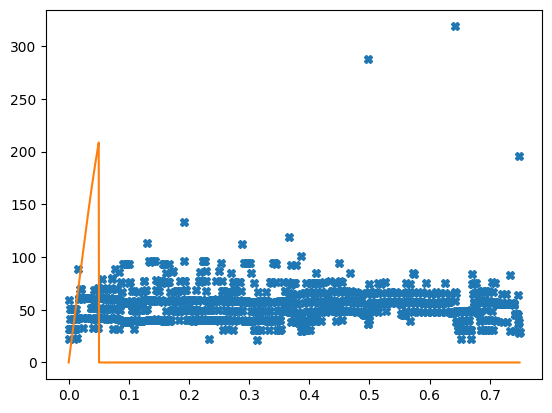

In [ ]:
strain = []
for i_x in range(0, 7500, 5):
    i_x = i_x/10000
    #print(i_x)
    strain.append(i_x)


plt.plot(strain, predictions[650], 'X')
plt.plot(strain, target_vector[650])

one more try

In [17]:
# Создание тензоров с заданными размерностями
features_tensor = tf.constant(feature_node) #tf.random.normal((300, 1500, 3), dtype=tf.float32)
adjacency_tensor = tf.constant(feature_adj) #tf.random.uniform((300, 1500, 1500), minval=0, maxval=1, dtype=tf.float32)
target_vector = tf.constant(target) #tf.random.uniform((300, 1500, 1), minval=0, maxval=1, dtype=tf.float32)

In [19]:
import tensorflow as tf

# Загрузите ваши данные
# features_tensor - тензор признаков с размерностью (300, 1500, 3)
# adjacency_tensor - тензор смежности с размерностью (300, 1500, 1500)
# target_vector - целевой вектор с размерностью (300, 1500, 1)

#features_tensor = tf.random.normal((300, 1500, 3))
#adjacency_tensor = tf.random.normal((300, 1500, 1500))
#target_vector = tf.random.normal((300, 1500, 1))

# Функция для предсказания целевого вектора
def predict_target(features, adjacency):
    # Инициализация весов и смещения для слоя密集 (Dense)
    weights = tf.Variable(tf.random.normal([3, 1500]))
    bias = tf.Variable(tf.zeros([1500]))

    # Расчет предсказания на основе тензора признаков
    # Мы сначала умножаем признаки на веса, а затем добавляем смещение
    predictions = tf.matmul(features, weights) + bias

    # Применение смежности к предсказаниям для понижения размерности
    # Мы умножаем предсказания на смежность, чтобы уменьшить размерность
    predictions = tf.matmul(adjacency, predictions)

    return predictions

# Вычисление предсказания
predicted_vector = predict_target(features_tensor, adjacency_tensor)

# Оценка качества предсказания (например, с использованием функции потерь)
loss = tf.reduce_mean(tf.square(predicted_vector - target_vector))

# Выводим информацию о потерях
print("Loss:", loss.numpy())

InvalidArgumentError: cannot compute BatchMatMulV2 as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:BatchMatMulV2]

In [ ]:
target_vector[0]

<tf.Tensor: shape=(1500, 1), dtype=float32, numpy=
array([[-1.0722394 ],
       [ 1.5902808 ],
       [-1.4572966 ],
       ...,
       [ 0.6344737 ],
       [ 1.364701  ],
       [ 0.12376379]], dtype=float32)>

In [ ]:
np.shape(predicted_vector[0])

TensorShape([1500, 1500])

In [ ]:
predicted_vector

<tf.Tensor: shape=(300, 1500, 1500), dtype=float32, numpy=
array([[[  -2.1749573 ,  -54.34014   ,  -51.47822   , ...,
            8.696686  ,   11.143     ,   25.963211  ],
        [  24.803928  ,   -2.6227074 ,  -10.83337   , ...,
          -21.248981  ,   19.296556  ,    7.1568985 ],
        [  44.520683  ,   -0.47619915,   -8.707214  , ...,
          -20.383692  ,   36.761337  ,   17.922403  ],
        ...,
        [  22.912642  ,   73.72694   ,  143.06573   , ...,
          189.83798   ,   37.294403  ,   54.996895  ],
        [ 100.35675   ,  -25.755287  ,  -30.292814  , ...,
           -7.099884  ,   94.77437   ,   66.385574  ],
        [  -6.0549817 ,   -2.9488595 ,   57.230766  , ...,
          164.68182   ,   23.279753  ,   62.08803   ]],

       [[ -45.77082   ,  -27.125822  ,  -30.032623  , ...,
           -9.713371  ,  -37.123367  ,  -18.291664  ],
        [ 131.45695   ,   31.137245  ,  112.3157    , ...,
          228.31566   ,  150.82947   ,  151.2756    ],
        [ -59.

archive

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Layer, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Создание тензоров с заданными размерностями
features_tensor = tf.random.normal((300, 1500, 3), dtype=tf.float32)
adjacency_tensor = tf.random.uniform((300, 1500, 1500), minval=0, maxval=1, dtype=tf.float32)
target_vector = tf.random.uniform((300, 1500, 1), minval=0, maxval=1, dtype=tf.float32)

# Определение слоя графовой свертки
class GraphConvolution(Layer):
    def __init__(self, units, activation=None, kernel_regularizer=None, **kwargs):
        super(GraphConvolution, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        self.kernel_regularizer = kernel_regularizer

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[0][-1], self.units),
                                      initializer='glorot_uniform',
                                      regularizer=self.kernel_regularizer,
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.units,),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        features, adjacency = inputs
        aggregated = tf.matmul(adjacency, features)
        output = tf.matmul(aggregated, self.kernel) + self.bias
        if self.activation is not None:
            output = self.activation(output)
        return output

# Определение модели
class GNNModel(Model):
    def __init__(self, units, activation='relu', **kwargs):
        super(GNNModel, self).__init__(**kwargs)
        self.graph_conv1 = GraphConvolution(units, activation=activation, kernel_regularizer=l2(0.001))
        self.graph_conv2 = GraphConvolution(units, activation=activation, kernel_regularizer=l2(0.001))
        self.dense1 = Dense(64, activation=activation, kernel_regularizer=l2(0.001))
        self.dense2 = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
        self.dropout = Dropout(0.5)
        self.batch_norm = BatchNormalization()

    def call(self, inputs):
        features, adjacency = inputs
        x = self.graph_conv1((features, adjacency))
        x = self.batch_norm(x)
        x = self.dropout(x)
        x = self.graph_conv2((x, adjacency))
        x = self.batch_norm(x)
        x = self.dropout(x)
        x = self.dense1(x)
        output = self.dense2(x)
        return output

# Создание и компиляция модели
model = GNNModel(units=64)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae', 'accuracy'])

# Обучение модели
history = model.fit([features_tensor, adjacency_tensor], target_vector, epochs=100, batch_size=32, validation_split=0.2)

# Предсказание целевой переменной
predictions = model.predict([features_tensor, adjacency_tensor])

# Вывод предсказаний
print("Предсказанный целевой вектор:")
print(predictions[0, :5, :])  # Вывод первых 5 элементов предсказаний для первого примера

# Визуализация истории обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('MAE over Epochs')

plt.show()

In [117]:
import torch
#import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

In [15]:
from sklearn.model_selection import train_test_split

In [103]:
x = torch.tensor(node)
#x = torch.tensor([[1,2],[3,4],[5,6]], dtype = torch.float)
#x = torch.randn(1500,3)

edge_index = torch.tensor(adj)
#edge_index = torch.tensor([[0,1,1,0], [1,0,0,1]], dtype = torch.long)
#edge_index = torch.randint(0, 1500, (1500,2)).t()

y = torch.tensor(stress)
#y = torch.tensor([0,1,0], dtype = torch.long)
#y = torch.randint(0,2,(1500,))

In [104]:
#preparing the object
data = Data(x = x, edge_index = edge_index, y = y)

In [105]:
#diviion of data on batches
#batch_size = 32
#batch = DataLoader([data], batch_size = batch_size, shuffle = True)

In [115]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16,2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x,edge_index)
        x = F.relu(x)
        x = F.dropout(x, training = self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim = 1)

In [116]:
model = Net()

output = model(data)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 1500 but got size 2 for tensor number 1 in the list.

In [97]:
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay = 5e-4)

model.train()
for epoch in range (150):
    optimizer.zero_grad()
    out = model(batch)
    loss = F.nll_loss(out, batch.y)
    loss.backward()
    optimizer.step()

AttributeError: 'DataLoader' object has no attribute 'x'

In [75]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(2,16)
        self.conv2 = GCNConv(16,2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x,edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim = 1)



In [76]:
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1, weight_decay = 5e-4)

model.train()
for epoch in range (150):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()

In [77]:
model.eval()
_,pred = model(data).max(dim=1)
print(pred)

tensor([0, 0, 0])


GNN architecture

In [3]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(16, 32)  # Входные признаки, выходные признаки
        self.conv2 = GCNConv(32, 64)
        self.fc = nn.Linear(64, 1)  # Для предсказания одного значения

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.fc(x)

        return x

In [4]:
# Создание искусственного графа для демонстрации
import numpy as np
import torch

# Признаки узлов (feature matrix)
x = torch.tensor(np.random.rand(100, 16), dtype=torch.float32)

# Матрица смежности (edge index)
edge_index = torch.tensor(np.random.randint(0, 100, size=(2, 200)), dtype=torch.long)

# Искусственные целевые значения (target)
y = torch.tensor(np.random.rand(100, 1), dtype=torch.float)

# Создание объекта Data
data = Data(x=x, edge_index=edge_index, y=y)

In [73]:
train_f, test_f, train_t, test_t = train_test_split(data, test_size=0.2, random_state=123)

NameError: name 'data' is not defined

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_dim=3))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear', kernel_initializer='he_normal'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_f, train_t, epochs=50, batch_size=32, verbose=1, validation_data=(test_f, test_t))

In [183]:
import torch
import torch.nn as nn
import torch_geometric.nn as pyg_nn
import torch_geometric.data as pyg_data

class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = pyg_nn.GCNConv(input_dim, hidden_dim)
        self.conv2 = pyg_nn.GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Инициализация модели
model = GCN(input_dim=5, hidden_dim=10, output_dim=1)

# Инициализация данных
x = torch.randn(10, 5)  # Фичи вершин
edge_index = torch.tensor([[0, 1, 2], [1, 2, 3]])  # Ребра графа
data = pyg_data.Data(x=x, edge_index=edge_index)

# Обучение модели
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, torch.randn(10, 1))  # Целевая функция
    loss.backward()
    optimizer.step()
    print(f'Эпоха {epoch+1}, потеря: {loss.item()}')

Эпоха 1, потеря: 1.5012576580047607
Эпоха 2, потеря: 1.408416509628296
Эпоха 3, потеря: 0.919580340385437
Эпоха 4, потеря: 0.21875600516796112
Эпоха 5, потеря: 0.9073436856269836
Эпоха 6, потеря: 1.2192972898483276
Эпоха 7, потеря: 1.374312400817871
Эпоха 8, потеря: 2.1139047145843506
Эпоха 9, потеря: 1.9617763757705688
Эпоха 10, потеря: 0.6763449311256409
Эпоха 11, потеря: 0.4052932858467102
Эпоха 12, потеря: 0.8743577003479004
Эпоха 13, потеря: 0.3238358497619629
Эпоха 14, потеря: 0.7510939240455627
Эпоха 15, потеря: 1.0064705610275269
Эпоха 16, потеря: 0.8416427373886108
Эпоха 17, потеря: 0.25891000032424927
Эпоха 18, потеря: 1.181067705154419
Эпоха 19, потеря: 0.7012327313423157
Эпоха 20, потеря: 0.5037442445755005
Эпоха 21, потеря: 1.0209001302719116
Эпоха 22, потеря: 1.7613451480865479
Эпоха 23, потеря: 0.8917140960693359
Эпоха 24, потеря: 1.4060600996017456
Эпоха 25, потеря: 1.4795019626617432
Эпоха 26, потеря: 1.685821533203125
Эпоха 27, потеря: 0.8159208297729492
Эпоха 28, пот

In [ ]:
data = Data(x=train_f, y=train_t)


model = Net()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

ValueError: 'GCNConv' received a tuple of node features as input while this layer does not support bipartite message passing. Please try other layers such as 'SAGEConv' or 'GraphConv' instead

# NN


последние нервные клетки

ValueError: Data cardinality is ambiguous:
  x sizes: 1760, 2525, 1345, 1621, 1191, 1858, 1336, 1905, 1259, 1119, 1709, 2113, 1553, 1427, 1061, 2033, 1630, 1216, 1318, 2751, 1971, 3390, 1576, 1482, 1528, 2116, 1076, 1616, 2047, 1668, 1406, 2302, 1896, 1033, 1803, 1574, 932, 1420, 2749, 1619, 4381, 1522, 1559, 1747, 1971, 1307, 3762, 1827, 2138, 1400, 976, 1706, 1104, 2113, 2584, 3296, 1935, 1404, 3533, 1550, 3661, 1990, 1800, 2935, 1286, 1865, 1203, 2266, 1590, 2485, 2043, 1756, 3335, 3860, 1337, 1860, 1369, 1294, 3389, 1672, 1375, 3371, 2048, 2107, 1937, 1409, 1375, 1406, 1359, 1682, 1354, 2007, 4132, 1669, 1114, 2349, 1041, 1030, 2471, 1141, 1048, 1535, 958
  y sizes: 201, 201, 201, 101, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 31, 201, 201, 201, 201, 201, 101, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 31, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 31, 201, 201, 201, 31, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 31, 201, 201, 201
Make sure all arrays contain the same number of samples.

нейросеть с претензиями

In [ ]:
test_t[8][:50]

array([  0.        ,  12.65576268,  25.31152536,  37.96728804,
        50.62305072,  63.2788134 ,  75.93457608,  88.58842712,
       101.22101675, 113.80995277, 126.34001652, 138.73805672,
       150.98574154, 163.1013738 , 174.96177418, 186.52557089,
       197.74552363, 208.53547526, 218.7469881 , 228.32517154,
       237.13420954, 244.97156694, 251.73571772, 257.44346578,
       262.21554994, 266.25812383, 269.74800814, 272.83059438,
       275.56390508, 278.03998988, 280.32969033, 282.46487505,
       284.4661268 , 286.34198496, 288.12120282, 289.81207129,
       291.42384646, 292.96616405, 294.43733331, 295.84920258,
       297.20254411, 298.50146606, 299.7479956 , 300.95570575,
       302.10877555, 303.2332044 , 304.32270869, 305.38730689,
       306.4166813 , 307.41627541])

In [ ]:
pred = model.predict(test_f[3])
pred[:42]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[ 66.304115],
       [ 96.955055],
       [112.49579 ],
       [114.99923 ],
       [115.40535 ],
       [139.74297 ],
       [ 61.178707],
       [ 90.46284 ],
       [ 93.41815 ],
       [ 70.70319 ],
       [ 79.82787 ],
       [ 90.972725],
       [133.22073 ],
       [ 42.59897 ],
       [ 41.662792],
       [ 39.900475],
       [155.22253 ],
       [ 87.66855 ],
       [ 45.10816 ],
       [ 48.28219 ],
       [ 98.77663 ],
       [ 75.31194 ],
       [ 44.405575],
       [ 37.549946],
       [ 47.804417],
       [116.54075 ],
       [ 92.78186 ],
       [ 96.123314],
       [109.26391 ],
       [ 36.809563],
       [ 67.26446 ],
       [ 98.40391 ],
       [ 90.40045 ],
       [167.17859 ],
       [ 94.44471 ],
       [101.68268 ],
       [ 36.693825],
       [117.29208 ],
       [ 55.25253 ],
       [ 89.24016 ],
       [ 34.209183],
       [ 89.85409 ]], dtype=float32)

In [ ]:
pred = model.predict(test_f[2])
pred[:42]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[179.6745  ],
       [193.20662 ],
       [172.64095 ],
       [165.9241  ],
       [176.74745 ],
       [159.62778 ],
       [175.58292 ],
       [171.45    ],
       [158.51625 ],
       [ 92.42684 ],
       [193.20528 ],
       [188.19754 ],
       [150.93    ],
       [147.1161  ],
       [ 24.04711 ],
       [120.860756],
       [188.08876 ],
       [ 77.07788 ],
       [197.7839  ],
       [208.4985  ],
       [191.87285 ],
       [176.30086 ],
       [123.99717 ],
       [161.9284  ],
       [121.32915 ],
       [225.66449 ],
       [202.21933 ],
       [192.56741 ],
       [180.8009  ],
       [113.90103 ],
       [171.27615 ],
       [191.97586 ],
       [182.69894 ],
       [214.72342 ],
       [171.42969 ],
       [224.65002 ],
       [232.76062 ],
       [104.01805 ],
       [133.10298 ],
       [139.17867 ],
       [144.8843  ],
       [189.6064  ]], dtype=float32)

# CatBoost

In [ ]:
pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
feature_array = np.array(feature)
vector1, vector2, vector3 = feature_array[:, :, 0], feature_array[:, :, 1], feature_array[:, :, 2]

In [ ]:
feature2 = np.column_stack((vector1, vector2, vector3))
np.shape(feature2)

(1378, 300)

проверить размерности датасетов

In [ ]:
train_f, test_f, train_t, test_t = train_test_split(feature2, target, test_size=0.2, random_state=123)

train_pool = Pool(train_f, train_t)
test_pool = Pool(test_f, test_t)

In [ ]:
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6)
model.fit(train_pool)
y_pred = model.predict(test_pool)

# Оцените качество модели
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

CatBoostError: catboost/private/libs/target/data_providers.cpp:639: Currently only multi-regression, multilabel and survival objectives work with multidimensional target

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')